<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/knn_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Zoo.csv")

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [9]:
df['animal name']=df['animal name'].astype('category')

split the dataset

In [13]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:16]
y = df.iloc[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=Y)

In [14]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
76,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0


In [15]:
y_train

35    0
76    0
48    1
86    1
90    1
     ..
59    0
21    0
65    1
89    0
52    0
Name: catsize, Length: 80, dtype: int64

In [16]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0
79,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
74,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0


In [17]:
y_test

71     1
36     0
17     1
1      1
6      1
91     0
79     0
74     1
100    0
83     0
38     0
20     0
14     0
10     1
34     0
46     0
29     1
44     1
26     0
4      1
73     0
Name: catsize, dtype: int64

In [18]:
num_folds = 10
kfold = KFold(n_splits=10)

In [19]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, y, cv=kfold)

In [20]:
results

array([0.90909091, 0.8       , 0.7       , 0.8       , 0.9       ,
       0.4       , 0.9       , 0.8       , 0.7       , 0.6       ])

In [21]:
print(results.mean())

0.7509090909090909


Grid Search for Algorithm Tuning

In [22]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:


print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


Visualizing the CV results

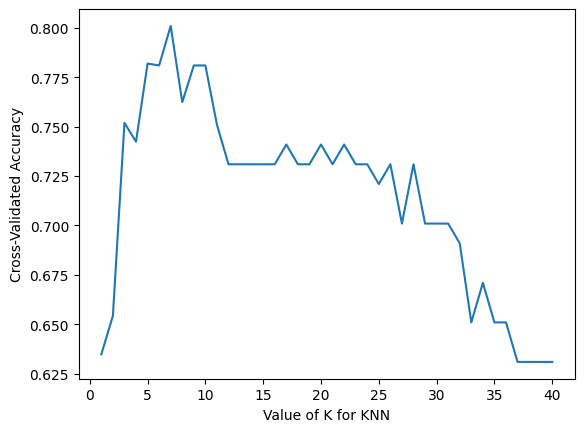

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()